Test vs predictions, 1 day forecast with ARIMA.

In [11]:
# import libraries
from datetime import datetime, timedelta
import dateutil.parser
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,8)
import numpy as np
import pandas as pd
import pickle
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [12]:
def plot_test_vs_predictions(arg_dict):
    """Line plot of the test (actual) vs the ARIMA model predictions"""
    
    # Assemble title
    title = ('ARIMA Model Test vs Predictions For {} ({}) For {} Days').format(
        arg_dict['dependent_variable'], arg_dict['place'], len(arg_dict['test']))
    plt.title(title)

    # Create x and y axis labels
    plt.xlabel('Days')
    y_label = 'Cumulative {} By Day'.format(arg_dict["dependent_variable"])
    plt.ylabel(y_label)

    # Create plot
    plt.plot(arg_dict['test'], linewidth=2, label='Test')
    plt.plot(arg_dict['predictions'], linewidth=2, label='Predictions')
    plt.legend()
    plt.savefig(r'pics/test_vs_prediction.png');
    

In [13]:
def __getnewargs__(self):
    """# monkey patch around bug in ARIMA class"""
    
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))


In [14]:
def save_model_data(arg_dict):
    """Save the model to disk"""
    
    ARIMA.__getnewargs__ = __getnewargs__

    # save model
    arg_dict['model_fit'].save(r'data/model.pkl')
    np.save(r'data/model_bias.npy', [arg_dict['bias']])
    

In [15]:
def place_value(number): 
    """Changes number to a readable number with ','s for 000s'"""
    
    number = int(number)
    
    return ("{:,}".format(number))


In [16]:
def forecast_1day(arg_dict):
    '''load finalized model and make a prediction'''

    # Load model
    model_fit = ARIMAResults.load(r'data/model.pkl')
    bias = np.load(r'data/model_bias.npy')

    # Pick a future to predict. 0 means literally tomorrow.
    yhat = bias + float(model_fit.forecast()[0])
    print(f"The predicted cumulative {arg_dict['dependent_variable']} for {arg_dict['place']} \
for tomorrow (input data plus 1 day) are {place_value(yhat)}")


In [17]:
def driver(arg_dict):
    """driver function for plot, save, forecast"""
    
    # Line plot of the test (actual) vs the ARIMA model predictions
    plot_test_vs_predictions(arg_dict)
    
    # Save the model
    save_model_data(arg_dict)
    
    # load finalized model and make a prediction
    forecast_1day(arg_dict)


The predicted cumulative Deaths for Quebec for tomorrow (input data plus 1 day) are 4,512


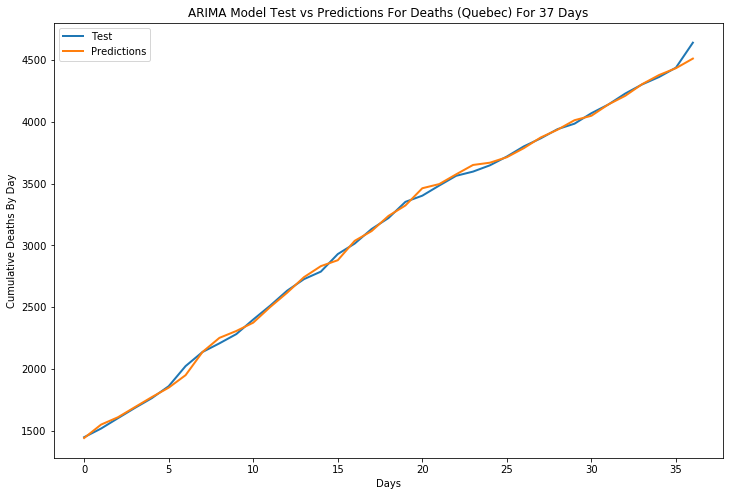

In [18]:
if __name__ == '__main__':
    
    # Prepare arguments for driver
    with open('arg_dict.pickle', 'rb') as handle:
        arg_dict = pickle.load(handle)
    
    arg_dict.update({'date': '12-31-2020'})
    df = pd.read_csv('df.csv', parse_dates=True, index_col='Date_')
    
    # Start driver
    forecast_df = driver(arg_dict) 
